# Exercise 05: Homework Assignment 2.1 (w/o solution)

Homework "ML Fundamentals & Implementation"

Please add your implementations in the indicated cells below.

In [1]:
import numpy as np
import pandas as pd

import sklearn.metrics
import sklearn.datasets
import sklearn.model_selection
import sklearn.linear_model
import sklearn.cluster
import sklearn.metrics.pairwise

import statsmodels.regression

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist

In [2]:
N = 1_000

In [3]:
np.random.seed(501)

<br>
<br>

## Binary Cross-Entropy Loss

$
{\displaystyle Loss=-\sum _{x\in {\mathcal {X}}}y\,\log p(x)}
$

### Data

In [5]:
X, y = sklearn.datasets.make_classification(
    n_samples=N,
    n_classes=2,
    n_features=20,
    random_state=501
)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X,
    y,
    test_size=0.3
)

model1 = sklearn.linear_model.LogisticRegression()
model1.fit(X_train, y_train)

df = pd.DataFrame({
    "y": y_test,
    "p": model1.predict_proba(X_test)[:,1]
})

### sklearn

In [6]:
loss_skl = sklearn.metrics.log_loss(df["y"], df["p"])
loss_skl

0.36328772771094564

In [7]:
df["y"]

0      0
1      1
2      0
3      1
4      0
      ..
295    1
296    0
297    0
298    1
299    1
Name: y, Length: 300, dtype: int64

### Manual implementation

In [18]:
# please add your implementation here

def binary_cross(y, p):
    y = y.values
    p = p.values
    loss = -np.add(np.dot(y, np.log(p)), np.dot(1-y, np.log(1-p)))/len(y)
    return loss

binary_cross(df["y"], df["p"])


0.3632877277109457

<br>
<br>

## R<sup>2</sup> Score (Coefficient of Determination)

### Mathematical

$
{\displaystyle R^{2}=1-{SS_{\rm {res}} \over SS_{\rm {tot}}}\,}
$

with 

$
\quad {\displaystyle \color{red}{SS_{\text{tot}}}=\sum _{i}(y_{i}-{\bar {y}})^{2}}
$

$
\quad {\displaystyle \color{blue}{SS_{\text{res}}}=\sum _{i}(y_{i}-f_{i})^{2}=\sum _{i}e_{i}^{2}\,}
$

$
\quad {\bar {y}}={\frac {1}{n}}\sum _{i=1}^{n}y_{i}
$

### Visual

<center><img src=../img/r2.png width="600"></center>

[(Source)](https://en.wikipedia.org/wiki/Coefficient_of_determination)

In [24]:
X, y, coef = sklearn.datasets.make_regression(
    n_samples=N,
    n_features=1,
    n_informative=1,
    noise=10,
    coef=True,
    random_state=501
)

lr = sklearn.linear_model.LinearRegression()
lr_res = lr.fit(X, y)

df = pd.DataFrame({
    "y": y,
    "yhat": lr.predict(X),
})

coef, lr.coef_

(array(25.87264287), array([26.18812014]))

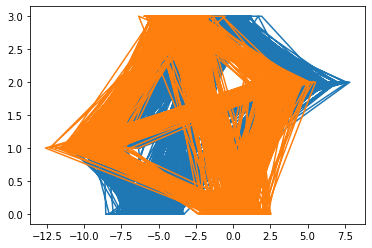

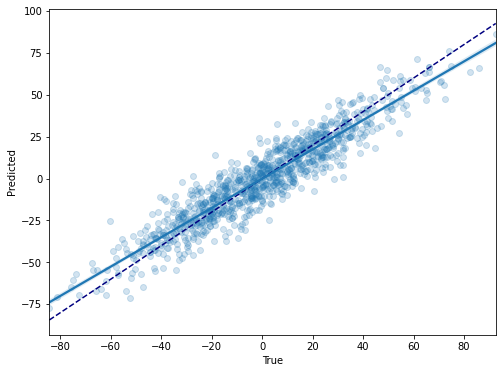

In [25]:
plt.figure(figsize=(8,6))
y_min = df.values.min()
y_max = df.values.max()
plt.plot(
    [y_min, y_max],
    [y_min, y_max],
    color="navy",
    linestyle="--"
)
sns.regplot(
    x="y",
    y="yhat",
    data=df,
    scatter_kws={"alpha": 0.2}
)
plt.xlabel("True")
_ = plt.ylabel("Predicted")

### sklearn

In [26]:
r2_skl = sklearn.metrics.r2_score(
    df["y"],
    df["yhat"]
)
r2_skl

0.8746148306382374

### Manual implementation

In [29]:
# please add your implementation here

def r2_loss(y, y_hat):
    y = y.values
    y_hat = y_hat.values
    y_mean = np.mean(y)
    ss_res = np.sum(np.power(y-y_hat, 2))
    ss_tot = np.sum(np.power(y-y_mean, 2))
    r2 = 1 - ss_res/ss_tot
    return r2

r2_loss(df["y"], df["yhat"])


0.8746148306382374

<br>
<br>

## Silhouette

### Mathematical

For each point $i$:

$
{\displaystyle s(i)={\frac {b(i)-a(i)}{\max\{a(i),b(i)\}}}}
$

with

$
\quad {\displaystyle a(i)={\frac {1}{|C_{i}|-1}}\sum _{j\in C_{i},i\neq j}d(i,j)}
$

$
\quad {\displaystyle b(i)=\min _{k\neq i}{\frac {1}{|C_{k}|}}\sum _{j\in C_{k}}d(i,j)}
$


### Visual

<center><img src=../img/silhouette.png width="500"></center>


### Data

In [97]:
X, y = sklearn.datasets.make_blobs(
    n_samples=N,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=501
)


### sklearn

In [98]:
clusterer = sklearn.cluster.KMeans(
    n_clusters=3,
    random_state=501
)
cluster_labels = clusterer.fit_predict(X)
sil_skl = sklearn.metrics.silhouette_score(
    X,
    cluster_labels
)
sil_skl

0.693663427967365

In [99]:
sil_samples_skl = sklearn.metrics.silhouette_samples(
    X,
    cluster_labels
)

In [126]:
sil_samples_skl

array([0.79716943, 0.56500812, 0.59245749, 0.75061398, 0.64983468,
       0.58362195, 0.86024875, 0.56161736, 0.54854368, 0.79693683,
       0.87156251, 0.86526963, 0.84558235, 0.61828617, 0.58861924,
       0.77932866, 0.55952925, 0.62440476, 0.85533217, 0.46884624,
       0.87168848, 0.62641882, 0.56187955, 0.52379425, 0.45011067,
       0.85110354, 0.84035266, 0.82294235, 0.82998981, 0.58198364,
       0.77741837, 0.81371797, 0.85956212, 0.64290759, 0.86770501,
       0.8689534 , 0.86583711, 0.76953954, 0.80917019, 0.82942288,
       0.34178349, 0.62349796, 0.87858684, 0.86384661, 0.57880292,
       0.79164456, 0.84687566, 0.63599051, 0.81612237, 0.63145607,
       0.84089437, 0.84130825, 0.37029988, 0.52096893, 0.75332715,
       0.51101128, 0.52774576, 0.87977011, 0.56700732, 0.84955268,
       0.51489936, 0.55635369, 0.78400874, 0.63453384, 0.75519401,
       0.60363979, 0.54325034, 0.60104235, 0.51083964, 0.5262132 ,
       0.62576246, 0.51212863, 0.41363556, 0.59282165, 0.87235

### Manual implementation

In [128]:
# please add your implementation here

def silhouette(x, cluster_labels):
    
    cluster_1 = []
    cluster_2 = []
    cluster_3 = []
    
    # put the values with the same cluster laber to the same list
    cluster_1 = list(x[i] for i in range(len(x)) if cluster_labels[i]==0)
    cluster_2 = list(x[i] for i in range(len(x)) if cluster_labels[i]==1)
    cluster_3 = list(x[i] for i in range(len(x)) if cluster_labels[i]==2)
    
    #create a list that we will later iterate through
    cluster_dict = {
        "cluster_1": cluster_1,
        "cluster_2": cluster_2,
        "cluster_3": cluster_3,
    }
    
    
    silhouette_coefficient_point = []
    all_point_coefficients = []
    silhouette_coefficient_cluster = []
    
    #calculate the average distance to the points in the same cluster and to the points in the other clusters
    cluster_dict_distance = {}
    for k, v in cluster_dict.items():
        
        items_num = len(v)
        for key, value in cluster_dict.items():
            items2_num = len(value)
            if (k == key):
                dist = cdist(v, v)
                second_cluster = k
                same_cluster = 1 #if its the same cluster we need to substract the 1 from the dividor
                
            else: 
                dist = cdist(v, value)
                second_cluster = key
                same_cluster = 0
                
                
            cluster_dict_distance[f'{k}_{second_cluster}_distances'] = []    
                   
            j=0
            
           
            while j<items_num:
                
                cluster_dict_distance[f'{k}_{second_cluster}_distances'].append(sum(dist[j])/(items2_num-same_cluster))
                
                j += 1    
                
    #iterate over clusters and point ot get the silhouette coefficient for every point
    for k, v in cluster_dict.items():
        
        items_num = len(v)
        
        silhouette_coefficient_for_a_point = []
        second_cluster = []
        for key, value in cluster_dict.items():
            
            
            if(k != key):
                second_cluster.append(key)
                
                
        for i in range(len(v)):
            
            closest_cluster = 0
            
            #print(cluster_dict_distance[f'{k}_{second_cluster[0]}_distances'])
            
            closest_cluster = np.minimum(cluster_dict_distance[f'{k}_{second_cluster[0]}_distances'][i], cluster_dict_distance[f'{k}_{second_cluster[1]}_distances'][i])

                        
            silhouette_coefficient_for_a_point.append((closest_cluster - cluster_dict_distance[f'{k}_{k}_distances'][i])/(max(closest_cluster, cluster_dict_distance[f'{k}_{k}_distances'][i])))

            
        #calculate the average coefficient for a cluster
        silhouette_coefficient_cluster.append(sum(silhouette_coefficient_for_a_point)/len(silhouette_coefficient_for_a_point))
        
        #append to a list all pointwise silhouettes 
        all_point_coefficients.append(silhouette_coefficient_for_a_point)
                    
    
    #unpack the list of lists to a list 
    all_point_coefficients = [y for x in all_point_coefficients for y in x]

    #unpack the list of lists to a list 
    return all_point_coefficients, silhouette_coefficient_cluster 

    
    #calculate average distance of dj to all other data points in clusters Ci, having i ̸= j; Determine bj = minimum(bj) across all the clusters except Ci.

point_sil, cluster_sil = silhouette(X, cluster_labels)

#silhouette is the same: 
print(sum(point_sil)/len(point_sil))  #0.693663427967365


0.6936634279673647


Text(0, 0.5, 'Silhouette')

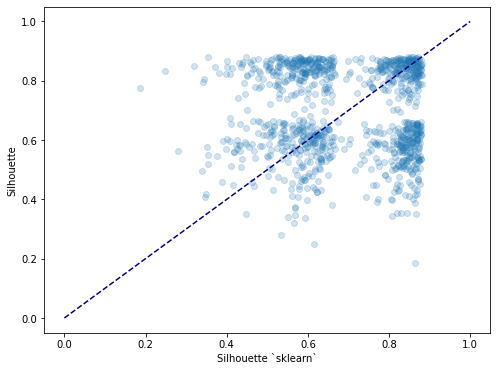

In [124]:
#values in my list with silhouette values are in different order thats why this is not working but the overall silhouette is right) 
plt.figure(figsize=(8,6))
plt.scatter(sil_samples_skl, point_sil, alpha=.2) # sil_samples is your sample-level silhouette
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlabel("Silhouette `sklearn`")
plt.ylabel("Silhouette")
# _ = plt.title("Silhouette Score Comparison")

<br>
<br>

## AUC

Based on confusion matrix:

<center><img src=../img/confusion.png width="1200"></center>

[(Source)](https://en.wikipedia.org/wiki/Confusion_matrix)

### Plot ROC Curve

In [85]:
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(8,6))
    plt.plot(
        fpr,
        tpr,
        color="darkorange",
        lw=2
    )
    plt.plot(
        [0, 1],
        [0, 1],
        color="navy",
        lw=2,
        linestyle="--"
    )
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic Curve")
    plt.show()

### Data

In [86]:
X, y = sklearn.datasets.make_classification(
    n_samples=N,
    n_classes=2,
    n_features=20,
    random_state=501
)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X,
    y,
    test_size=0.3
)

model1 = sklearn.linear_model.LogisticRegression()
model1.fit(X_train, y_train)

df = pd.DataFrame({
    "y": y_test,
    "p": model1.predict_proba(X_test)[:,1]
})

### sklearn

In [87]:
auc_skl = sklearn.metrics.roc_auc_score(
    df["y"],
    df["p"]
)
auc_skl

0.8972636262513903

In [88]:
fpr_skl, tpr_skl, _ = sklearn.metrics.roc_curve(
    df["y"],
    df["p"]
)

In [89]:
df["p"]

0      0.031377
1      0.605589
2      0.953783
3      0.028766
4      0.107492
         ...   
295    0.483206
296    0.301644
297    0.854633
298    0.126633
299    0.119611
Name: p, Length: 300, dtype: float64

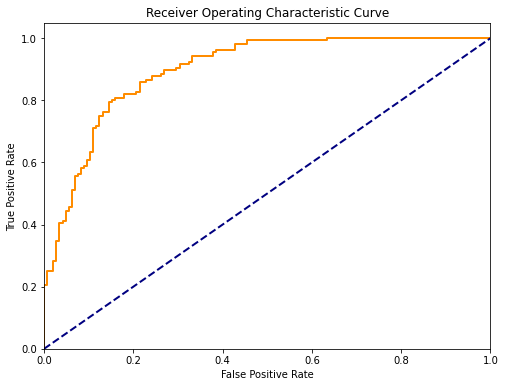

In [90]:
plot_roc_curve(fpr_skl, tpr_skl)

### Manual implementation

In [106]:
# please add your implementation here

# define a function that is supposed to calculate the integral
def integrate(x, y):
   sm = 0
   for i in range(1, len(x)):
       h = x[i] - x[i-1]
       sm += h * (y[i-1] + y[i]) / 2

   return sm

def auc(y, p, num_iter):
    #dataframe columns to numpy
    y = y.values
    p = p.values
    #assign to 0
    TP = TN = FP = FN = 0
    #create an empty list for both
    TPR = []
    FPR = []
    #create a threshold list
    threshold = np.linspace(0,1, num=num_iter)
    i = 0
    #loop thorough the threshold to gradually add the values to the lists TPR and FPR
    while i < len(threshold):
      
       
        TP = np.size(np.where((y==1) & (p>threshold[i])))
        FP = np.size(np.where((y==0) & (p>threshold[i])))
        FN = np.size(np.where((y==1) & (p<=threshold[i])))
        TN = np.size(np.where((y==0) & (p<=threshold[i])))
        TPR.append(TP/(TP+FN))
        FPR.append(FP/(TN+FP))
        i += 1
    
    #Sory the values in the lists 
    TPR.reverse()
    FPR.reverse()
    auc = integrate(FPR, TPR)
    
    return auc, TPR, FPR



                     
auc_value, TPR, FPR = auc(y = df["y"], p = df["p"], num_iter = 1001)

                     
    
    
    

In [100]:
threshold = np.linspace(0,1, num=1001)
threshold[0]

0.0

In [51]:
np.size(np.where((np.linspace(0,1, num=1001)>0.02) & (np.linspace(0,1, num=1001)<0.4)))

379

In [52]:
len(np.linspace(0,1, num=1001))

1001

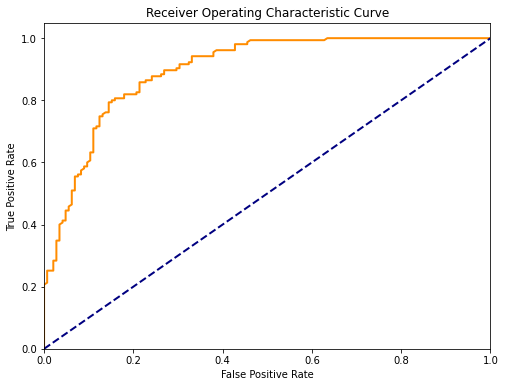

In [108]:
plot_roc_curve(FPR, TPR) # FPR and TPR includes your computation for FPR and TPR

&mdash; <br>
Dr. Sebastian Gabel <br>
Machine Learning in Marketing &ndash; Exercise 05 <br>
2020 <br>